* 회귀분석은 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법
* 여러 개의 독립변수와 한 개의 종속변수 간의 상관 관계를 찾는 것 (즉, 최적의 회귀계수를 찾아내는 것!) 
* 단일 회귀(독립변수 한개) / 다중 회귀 (독립변수 여러개) / 선형 회귀 (회귀계수 선형) / 비선형 회귀 (회귀계수 비선형)



         #### y = wx + e (y -> label / x -> feature / w -> 회귀계수 / e -> 편향값)

## boston 데이터 가져오기

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boaston dataset
boston = load_boston()

# boston dataset to DataFrame
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

# boston dataset's target array is house price. Add price column on dataframe
bostonDF["PRICE"]=boston.target

## 산점도와 reg 모델

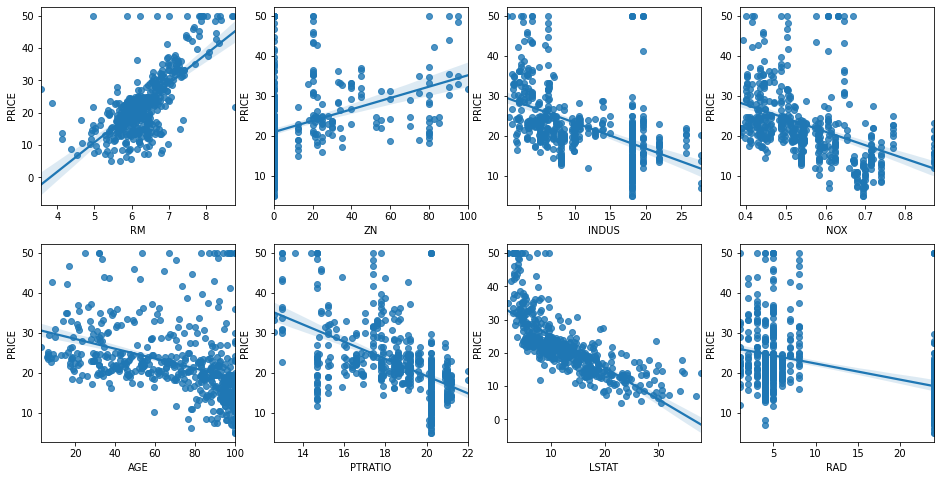

In [19]:
# 2개의 행과 4개의 열을 가진 subplots를 이용, axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ["RM", "ZN", "INDUS", "NOX", "AGE", "PTRATIO", "LSTAT", "RAD"]
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # seaborn의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y="PRICE", data=bostonDF, ax=axs[row][col])

## LinearRegression

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF["PRICE"]
x_data = bostonDF.drop(["PRICE"], axis=1, inplace=False)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size=0.2, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(x_train, y_train)
y_preds = lr.predict(x_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print("MSE: {0:.3f}, RMSE: {1:.3f}".format(mse, rmse))
print("Variance score: {0:.3f}".format(r2_score(y_test, y_preds)))
print("절편값:", lr.intercept_)
print("회귀 계수값:", np.round(lr.coef_,1))

MSE: 18.140, RMSE: 4.259
Variance score: 0.785
절편값: 39.290510119452556
회귀 계수값: [ -0.1   0.1   0.    2.8 -20.1   3.4   0.   -1.6   0.3  -0.   -0.9   0.
  -0.5]


In [26]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series 생성, index가 컬럼명에
coeff = pd.Series(data=np.round(lr.coef_, 1), index=x_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        2.8
RAD         0.3
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.5
PTRATIO    -0.9
DIS        -1.6
NOX       -20.1
dtype: float64

##### 회귀 계수를 살펴보며 영향 없어 보이는 feature들을 제거해주면, mse 좋아질지도

## 모델 평가

In [29]:
from sklearn.model_selection import cross_val_score

# cross_val_score() 5 Fold 셋으로 MSE 구한 뒤 다시 MRSE 구하기.
neg_mse_scores = cross_val_score(lr, x_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print("5 folds의 개별 Negative MSE scores: ", np.round(neg_mse_scores, 2))
print("5 folds의 개별 RMSE scores: ", np.round(rmse_scores, 2))
print("5 folds의 평균 RMSE: {0:.3f}".format(avg_rmse))

5 folds의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores:  [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE: 5.829


##### Q: 왜 minus MSE를 했을까?
##### A: cross_val_score()은 결과값 숫자가 클 수록 좋은 모델이라고 평가하는 것인데, MSE는 클 수록 나쁜 것임. 그래서 Minus를 넣어주는 것

## 릿지(Ridge) 회귀

In [7]:
# 앞의 LinearRegression 예제에서 분할한 feature 데이터 셋인 x_data와 target 데이터 셋인 y_target 데이터 셋을 그대로 이용

from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np

# boston data set
boston = load_boston()

# boston data set to DataFrame
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함
bostonDF["PRICE"] = boston.target
print("Boston DataSet Size: ", bostonDF.shape)

y_target = bostonDF["PRICE"]
x_data = bostonDF.drop(["PRICE"], axis=1, inplace=False)

ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, x_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print("5 folds의 개별 Negative MSE scores: ", np.round(neg_mse_scores, 2))
print("5 folds의 개별 RMSE scores: ", np.round(rmse_scores, 2))
print("5 folds의 평균 RMSE: {0:.3f}".format(avg_rmse))

Boston DataSet Size:  (506, 14)
5 folds의 개별 Negative MSE scores:  [-11.42 -24.29 -28.14 -74.6  -28.52]
5 folds의 개별 RMSE scores:  [3.38 4.93 5.31 8.64 5.34]
5 folds의 평균 RMSE: 5.518


### alpha 조정 테스트

In [37]:
# Ridge에 사용될 alpha 파라미터의 값들을 정의

alphas = [x for x in np.linspace(0, 200, 5)]
avg_rmse = []
# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    
    # cross_val_score를 이용하여 5 fold의 평균 rmse 계산
    neg_mse_scores = cross_val_score(ridge, x_data, y_target, scoring="neg_mean_squared_error", cv=5)
    avg_rmse.append(np.mean(np.sqrt(-1*neg_mse_scores)))
    
print("alpha {0:.1f}일 때 5 folds의 평균 RMSE: {1:.3f}".format(alphas[avg_rmse.index(min(avg_rmse))], min(avg_rmse)))

alpha 150.0일 때 5 folds의 평균 RMSE: 5.328


### 각 alpha에 따른 회귀 계수 시각화. 각 alpha 값 별로 plt.subplots로 matplotlib 축 생성

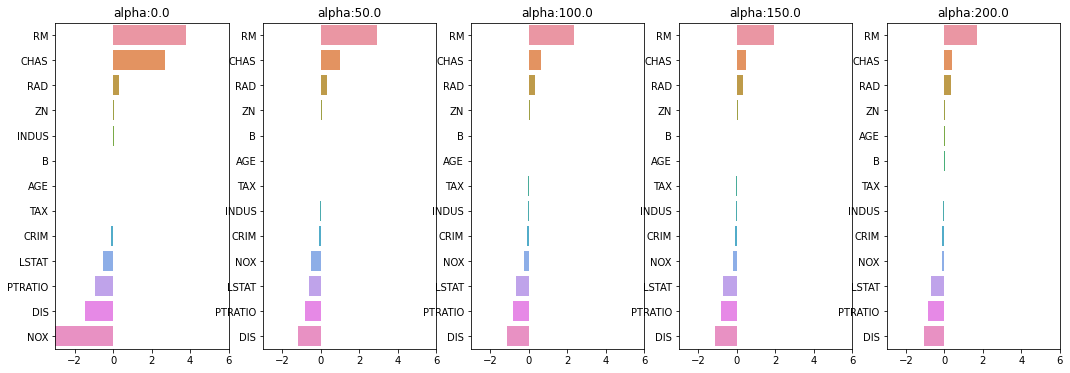

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(x_data , y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=ridge.coef_ , index=x_data.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

In [41]:
## alpha 값에 따른 컬럼별 회귀계수 출력

ridge_alphas=[x for x in np.linspace(0, 200, 5)]
sort_column = "alpha:"+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0.0,alpha:50.0,alpha:100.0,alpha:150.0,alpha:200.0
RM,3.809865,2.935628,2.334536,1.945427,1.672973
CHAS,2.686734,1.006040,0.638335,0.472453,0.377547
RAD,0.306049,0.300619,0.315358,0.323369,0.327895
ZN,0.046420,0.052771,0.054496,0.055245,0.055547
INDUS,0.020559,-0.050937,-0.052826,-0.052757,-0.051809
B,0.009312,0.009744,0.009393,0.009139,0.008949
AGE,0.000692,-0.004807,0.001212,0.005691,0.009233
TAX,-0.012335,-0.015208,-0.015856,-0.016214,-0.016437
CRIM,-0.108011,-0.102263,-0.102202,-0.101606,-0.100830
LSTAT,-0.524758,-0.618128,-0.660764,-0.687821,-0.706464


## 라쏘(Lasso) 회귀

## 엘라스틱넷(ElasticNet) 회귀